In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np 
import re


In [ ]:
# !unzip /content/drive/MyDrive/fake-news.zip

In [ ]:
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

In [ ]:
# train.info()

In [ ]:
# test.info()

In [ ]:
# train = train[["text","label"]]
# # test = test[["text"]]

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/cleandata.csv')

In [ ]:
def text_cleaning(text):
    text = str(text)
    text = re.sub("[^a-zA-Z]", " ", text) 
    text = re.sub('[#,@,&]', '',text)
    text = re.sub('\d*','', text)
    text = re.sub('w{3}','', text)
    text = re.sub("http\S+", "", text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', '', text)

    return text

In [ ]:
train['text']=train['text'].apply(text_cleaning)


In [ ]:
train

,Unnamed: 0,text,label
0,0,donald trump wish american happi new year lea...,1
1,1,hous intellig committe chairman devin nune go...,1
2,2,friday reveal former milwauke sheriff david c...,1
3,3,christma day donald trump announc would back ...,1
4,4,pope franci use annual christma day messag re...,1
...,...,...,...
44893,21412,nato alli tuesday welcom presid donald trump ...,0
44894,21413,lexisnexi provid legal regulatori busi inform...,0
44895,21414,shadow disus soviet era factori minsk street ...,0
44896,21415,vatican secretari state cardin pietro parolin...,0


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'with', 'is', 'as', 'won', 'i', "you'd", 'under', 'until', 'over', 'theirs', 'so', "wasn't", 'that', 'more', 'they', "should've", 'yours', 'what', 'by', 's', 'y', 'haven', 'further', 'which', 'but', 'no', 'and', 'other', 'yourselves', 'these', 'during', "haven't", 'don', "wouldn't", 'have', 'because', 'm', "mightn't", 'wasn', 'of', 'hers', 't', "it's", "weren't", 'hadn', 'who', 'weren', 'same', 'himself', 'mightn', 'any', 'it', 'do', 're', 'mustn', 'him', 'our', 'isn', 'there', 'her', 'were', 'am', 'than', "that'll", 'them', 'very', 'all', 'at', 'will', 'here', 'then', 'shan', 'off', 'his', 'from', 'few', "isn't", 'myself', "couldn't", 'or', 'll', "doesn't", 'shouldn', "you'll", 'was', 'you', 'between', 'wouldn', 'having', 'herself', 'such', 'should', 'doing', 'he', 'couldn', 'has', 'through', 'itself', 'ain', "hadn't", 'own', 'she', 'doesn', 'some', 'the', 'its', 'for', 'ourselves', 'when', 'after', 'on', 'below', 'we', 'didn', "hasn't", 'needn', 'been', 'above', 'hasn', "needn't", '

# remove stop words

In [ ]:
train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# stemming and lemmatization

In [ ]:
st = PorterStemmer()
lemm = WordNetLemmatizer()

In [ ]:
def stem_lemm(text):
  words = word_tokenize(text)
  ans = ""
  for word in words:
    w = st.stem(word)
    w = lemm.lemmatize(w)
    ans = ans+" "+w
  return ans


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
train['text'] = train['text'].apply(stem_lemm)

LookupError: ignored

In [ ]:
train.to_csv('cleandata.csv',index = False)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/cleandata.csv')

In [ ]:

train.text[0]

' donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news medium former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year great year america donaldtrump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb use word hater new year wish marlen marlen decemb say happ

In [ ]:
train.dropna(inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44897 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44897 non-null  int64 
 1   text        44897 non-null  object
 2   label       44897 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
X = train.text
y = train.label

# bayes model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer()
X = vect.fit_transform(X)

In [ ]:
dir(vect)
print(len(vect.vocabulary_))

110557


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: label, Length: 44897, dtype: int64

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model_nb = MultinomialNB()

In [ ]:
model_nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
p = model_nb.predict(X_train)

In [ ]:
accuracy_score(y_train,p)

0.9372195882521399

In [ ]:
model_nb.predict(X_train)

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
pred = model_nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,plot_roc_curve

In [ ]:
print(accuracy_score(y_test,pred))

0.9272457312546399


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6355
           1       0.93      0.94      0.93      7115

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
matrix = confusion_matrix(y_test,pred)

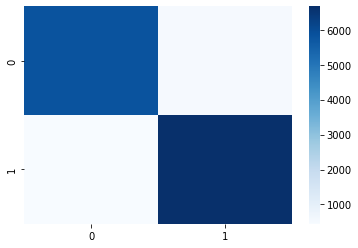

In [ ]:
sns.heatmap(matrix,cmap = "Blues")
plt.show()

In [ ]:
model_nb.predict_proba(X_test)[:, 1]

array([0.98621356, 0.98802347, 0.00895096, ..., 0.02482334, 0.03766771,
       0.99975302])

In [ ]:
print(roc_auc_score(y_test,model_nb.predict_proba(X_test)[:, 1]))

0.9777083355219106


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


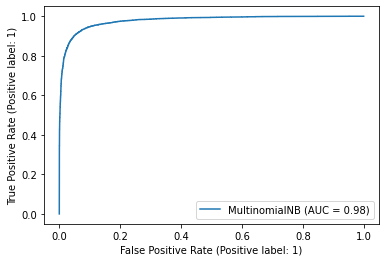

In [ ]:
plot_roc_curve(model_nb,X_test,y_test)